In [17]:
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
%matplotlib inline

import importlib
from globals import *
import cell
import tissue
import time

importlib.reload(cell)
importlib.reload(tissue)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'tissue' from '/Users/tomernadiv/Desktop/MSc/Courses/DS Project/vertex_model/tissue.py'>

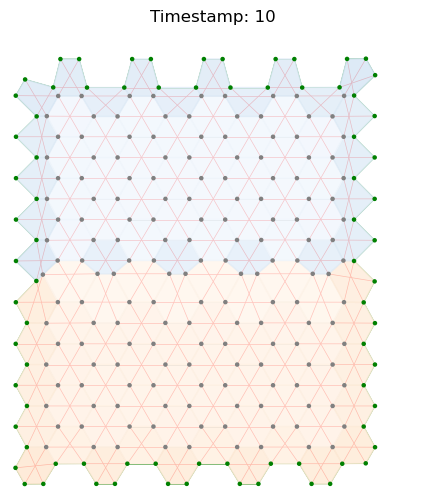

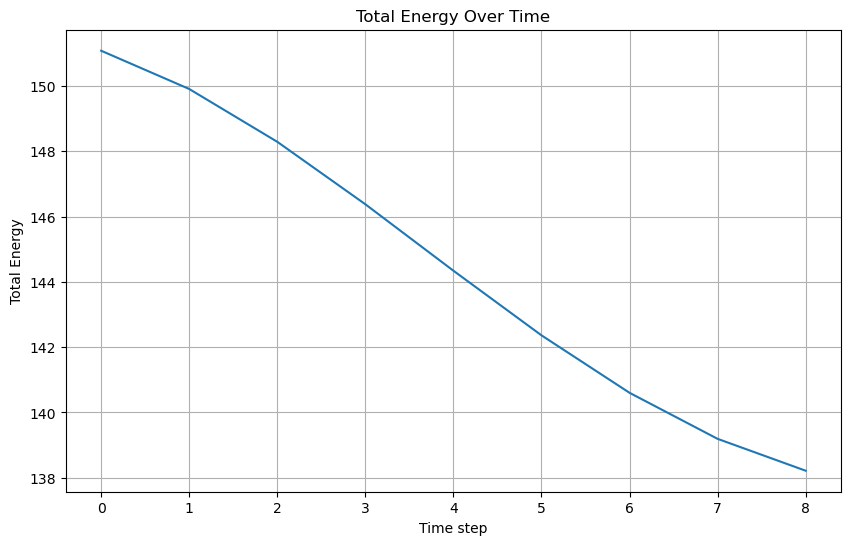

In [18]:
T = tissue.Tissue(cell_radius=cell_radius, num_cols=10, num_rows=10)

time_limit = 10
total_energy = []
for t in range(1, time_limit):

    # plotting
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 10))
    ax1.set_title(f"Timestamp: {t}")
    T.plot_tissue(ax=ax1)
    T.plot_heights_distribution(ax=ax2, bins=30)
    plt.tight_layout()
    plt.show()
    clear_output(wait=True)
    time.sleep(0.5)

    # computation
    T.compute_all_forces(['spring', 'line_tension'])
    T.update_positions(dt=0.01)
    T.update_heights()
    total_energy.append(T.compute_total_energy())

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title(f"Timestamp: {time_limit}")
T.plot_tissue(ax=ax)
plt.show()

plt.plot(total_energy)
plt.xlabel("Time step")
plt.ylabel("Total Energy" )
plt.title("Total Energy Over Time")
plt.grid(True)
plt.show()